# <center>Day-1 Practical Session, 25 May 2021</center>
## <center>Part 2: Bipartite Incidence Graph (BIG) for Adaptive Cluster Sampling (ACS)</center>
#### <center> *Li-Chun Zhang*<sup>1,2,3</sup> and *Melike Oguz-Alper*<sup>2</sup> </center>
  
##### <center> <sup>1</sup>*University of Southampton (L.Zhang@soton.ac.uk)*, <sup>2</sup>*Statistics Norway*, <sup>3</sup>*University of Oslo* </center>
***

### Illustration II: Two-Stage Adaptive Cluster Sampling (Thompson 1991)

In this illustration, a modified BIG strategy will be applied to the two-stage ACS considered by Thompson (1991). Variances of the HTEs of the population mean under SRS and two-stage ACS will be compared for chosen sample sizes.

***
#### Description of the population and sampling strategies
* A spatial field divided into $20\times 20$ grids. 
* The parameter of interest: the mean number of rare species per grid 
* A two-stage sampling applied: vertical strips the *primary sampling units* and grids the *secondary sampling units*
* Strips selected with SRSWOR
* All grids in sample strips surveyed
* Adaptive tracing implemented at the second stage: once species observed all neighbouring grids surveyed. This continues until reaching empty neighbour grids in all four directions 
* Modified BIG, $\mathcal{B}^*$ applied due to existence of *edge* grids
* Use functions <font color=green>**skthPSUACS**</font> and <font color=green>**skthPSUACS_BIG**</font> to visuliase two-stage ACS and its BIG representation with modified BIG      
*** 
#### Formula sheet
* $F$: strips, $\Omega$: grids
* Population mean

    $\theta=\frac{\sum_{i\in F}y_i}{\bar{M}N}=326/400=0.815$, where $\bar{M}$ number of grids in each vertical strip and $N$ number of strips
* Unbiased estimator of the population mean based on initial sample, $s_0$

    $\hat{\theta}_{s_0}=\frac{\sum_{i\in s_0}y_i}{\bar{M}n}$, where $n$ number of sample strips
    
    
* HTE of the population mean under ACS:

    $\hat{\theta}_{HT}=\frac{1}{\bar{M}N}\sum_{\kappa\in \Omega_s} \frac{y_{\kappa}}{\pi_{(\kappa)}}$

* Variance of the HTE under SRS based on $s_0$:

    $\mathrm{V}(\hat{\theta}_{s_0})=\frac{1}{\bar{M}^2}\big(\frac{1}{n}-\frac{1}{N}\big)\frac{\sum_{i\in s_0}(y_i-\bar{y}_i)^2}{n-1}$
    
* Variance of the HTE under ACS:

    $\mathrm{V}(\hat{\theta}_{HT})=\frac{1}{\bar{M}^2 N^2}\sum_{\kappa\in \Omega}\sum_{\ell\in \Omega}\big(\frac{\pi_{(\kappa\ell)}}{\pi_{(\kappa)}\pi_{(\ell)}}-1\big)y_{\kappa}y_{\ell}$

* Calculation of the first-order inclusion probabilies $\pi_{(\kappa)}=\mathrm{Pr}(\kappa\in\Omega_s)$ under SRS of $s_0$:

    $\pi_{(\kappa)}=1-\bar{\pi}_{\beta_{\kappa}}=1-\binom{N-\mid\beta_{\kappa}\mid}{n}/\binom{N}{n}$, where $\mid\beta_{\kappa}\mid$ is the size of the ancestor network of $\kappa$. We have $\mid \beta_{\kappa}\mid=4$ for all $\kappa\in \Omega$.
    
* Calculation of the second-order inclusion probabilies $\pi_{(\kappa\ell)}=\mathrm{Pr}(\kappa,\ell\in\Omega_s)$ under SRS of $s_0$:
    
    $\pi_{(\kappa\ell)}=\pi_{(\kappa)}+\pi_{(\ell)}-(1-\bar{\pi}_{\beta_{\kappa}\cup \beta_{\ell}})=1-\binom{N-\mid\beta_{\kappa}\cup \beta_{\ell}\mid}{n}/\binom{N}{n}$. We have $\mid \beta_{\kappa}\cup \beta_{\ell}\mid=6$ for the first two specie-networks and $\mid \beta_{\kappa}\cup \beta_{\ell}\mid=8$ for $\kappa \in \{1,2\}$ and $\ell=3$. 
    
***
**N.B.** R-package **igraph** has to be installed
***

#### Description of R-function <font color=green>**mainPSUACS**<font>
##### 1. Function parameters
* **n**: Sample size. Choose among $1,2,\dots 20$. Default value 1.

##### 2. Main steps of the function
* Population data constructed
* Variances under SRS and two-stage ACS calculated
    
##### 3. Main outputs of the function
* Variances of the HTE of the population mean under SRS and two-stage ACS

    
***

In [1]:
# Load R-package igraph
library(igraph)

Warning message:
"package 'igraph' was built under R version 3.6.3"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [2]:
# ----------------------------------------------------------------------------------------------------------
# Population graph and BIG representation of Thompsons data (1991,ACS: designs with primary and secondary units,
# Biometrics, p.1115)
# ----------------------------------------------------------------------------------------------------------
# Plot 1: grids with cases
skthPSUACS <- function(){

x.lim <- 100
y.lim <- 105
grid.dim <- 5


plot(0,xaxt="n",yaxt="n",type="l",ylab="",xlab="",xlim=c(0,x.lim),ylim=c(0,y.lim),bty="n")
lines(c(0,0),c(0,x.lim)); lines(c(0,x.lim),c(0,0)); lines(c(0,x.lim),c(x.lim,x.lim)); lines(c(x.lim,x.lim),c(0,x.lim))

for(k in 1:20){
  tmp <- k*grid.dim
  lines(c(0,x.lim),c(tmp,tmp))
  lines(c(tmp,tmp),c(0,x.lim))
}

# Strip labels
for(k in 0:19){
  tmp <- grid.dim/2 + k*grid.dim
  tmp.label <- LETTERS[(k+1)]
  text(tmp,103,label=tmp.label,cex=1.2)
}


# First case-network
points(x=runif(2,0.5,4.5),y=runif(2,60.5,64.5),pch=20,cex=0.8)
points(x=runif(2,0.5,4.5),y=runif(2,55.5,59.5),pch=20,cex=0.8)
points(x=runif(1,5.5,9.5),y=runif(1,65.5,69.5),pch=20,cex=0.8)
points(x=runif(11,5.5,9.5),y=runif(11,60.5,64.5),pch=20,cex=0.8)
points(x=runif(22,5.5,9.5),y=runif(22,55.5,59.5),pch=20,cex=0.8)
points(x=runif(3,5.5,9.5),y=runif(3,50.5,54.5),pch=20,cex=0.8)
points(x=runif(1,10.5,14.5),y=runif(1,65.5,69.5),pch=20,cex=0.8)
points(x=runif(26,10.5,14.5),y=runif(26,60.5,64.5),pch=20,cex=0.8)
points(x=runif(19,10.5,14.5),y=runif(19,55.5,59.5),pch=20,cex=0.8)
points(x=runif(5,10.5,14.5),y=runif(5,50.5,54.5),pch=20,cex=0.8)
points(x=runif(1,15.5,19.5),y=runif(1,65.5,69.5),pch=20,cex=0.8)
points(x=runif(5,15.5,19.5),y=runif(5,60.5,64.5),pch=20,cex=0.8)
points(x=runif(8,15.5,19.5),y=runif(8,55.5,59.5),pch=20,cex=0.8)

# Second case-network
points(x=runif(1,10.5,14.5),y=runif(1,15.5,19.5),pch=20,cex=0.8)
points(x=runif(5,15.5,19.5),y=runif(5,10.5,14.5),pch=20,cex=0.8)
points(x=runif(10,15.5,19.5),y=runif(10,15.5,19.5),pch=20,cex=0.8)
points(x=runif(17,15.5,19.5),y=runif(17,20.5,24.5),pch=20,cex=0.8)
points(x=runif(2,20.5,24.5),y=runif(2,10.5,14.5),pch=20,cex=0.8)
points(x=runif(26,20.5,24.5),y=runif(26,15.5,19.5),pch=20,cex=0.8)
points(x=runif(26,20.5,24.5),y=runif(26,20.5,24.5),pch=20,cex=0.8)
points(x=runif(1,20.5,24.5),y=runif(1,25.5,29.5),pch=20,cex=0.8)
points(x=runif(1,25.5,29.5),y=runif(1,10.5,14.5),pch=20,cex=0.8)
points(x=runif(6,25.5,29.5),y=runif(6,15.5,19.5),pch=20,cex=0.8)
points(x=runif(9,25.5,29.5),y=runif(9,20.5,24.5),pch=20,cex=0.8)
points(x=runif(1,25.5,29.5),y=runif(1,25.5,29.5),pch=20,cex=0.8)

# Third case-network
points(x=runif(2,65.5,69.5),y=runif(2,75.5,79.5),pch=20,cex=0.8)
points(x=runif(2,70.5,74.5),y=runif(2,75.5,79.5),pch=20,cex=0.8)
points(x=runif(22,70.5,74.5),y=runif(22,80.5,84.5),pch=20,cex=0.8)
points(x=runif(14,70.5,74.5),y=runif(14,85.5,89.5),pch=20,cex=0.8)
points(x=runif(6,74.5,79.5),y=runif(6,75.5,79.5),pch=20,cex=0.8)
points(x=runif(38,74.5,79.5),y=runif(38,80.5,84.5),pch=20,cex=0.8)
points(x=runif(25,74.5,79.5),y=runif(25,85.5,89.5),pch=20,cex=0.8)
points(x=runif(1,80.5,84.5),y=runif(1,75.5,79.5),pch=20,cex=0.8)
points(x=runif(3,80.5,84.5),y=runif(3,80.5,84.5),pch=20,cex=0.8)
points(x=runif(2,80.5,84.5),y=runif(2,85.5,89.5),pch=20,cex=0.8)
}


# Plot 2: BIG representation
skthPSUACS_BIG <- function(){
a <- make_empty_graph(n=400)
vertex_attr(a) <- list(name = c(1:400))
vertex_attr(a, "label") <- V(a)$name


b <- make_empty_graph()
b <- add.vertices(b,nv=20,attr=list(name=LETTERS[1:20],type=rep(TRUE,20)))
b <- add.vertices(b,nv=400,attr=list(name=V(a)$name,type=rep(FALSE,length(V(a)))))


b <- add_edges(b,edges=as.character(c(8,9,8,28,9,29,28,29,28,27,29,30,28,48,29,49,27,47,47,48,48,49,49,50,47,67,48,68,49,69,67,68,68,69)),
               attr=list(type=rep(FALSE,17)))
b <- add_edges(b,edges=as.character(c(57,77,76,77,77,78,78,98,77,97,76,96,95,96,96,97,97,98,98,118,97,117,96,116,115,116,116,117,117,118)),
               attr=list(type=rep(FALSE,15)))
b <- add_edges(b,edges=as.character(c(265,285,285,284,284,283,283,303,284,304,285,305,303,304,304,305,303,323,304,324,305,325,323,
                                      324,324,325)),attr=list(type=rep(FALSE,13)))



k <- 0
temp.letter <- LETTERS[k+1]
k <- k + 1
start.node <- 0
b <- add.edges(b,edges=c(temp.letter,(start.node+1),temp.letter,(start.node+2),temp.letter,(start.node+3),temp.letter,(start.node+4),temp.letter,(start.node+5),
                         temp.letter,(start.node+6),temp.letter,(start.node+7),
                         temp.letter,(start.node+8),temp.letter,(start.node+9),temp.letter,(start.node+10),temp.letter,(start.node+11),temp.letter,(start.node+12),
                         temp.letter,(start.node+13),temp.letter,(start.node+14),
                         temp.letter,(start.node+15),temp.letter,(start.node+16),temp.letter,(start.node+17),temp.letter,(start.node+18),temp.letter,(start.node+19),
                         temp.letter,(start.node+20),
                         temp.letter,27,temp.letter,28,temp.letter,29,temp.letter,30,temp.letter,47,temp.letter,48,temp.letter,49,temp.letter,50,temp.letter,67,temp.letter,68,temp.letter,69),
               attr=list(name=paste(temp.letter,c(1:31),sep=''),type=rep(TRUE,31)))

temp.letter <- LETTERS[k+1]
k <- k + 1
start.node <- start.node + 20
b <- add.edges(b,edges=c(temp.letter,(start.node+1),temp.letter,(start.node+2),temp.letter,(start.node+3),temp.letter,(start.node+4),temp.letter,(start.node+5),
                         temp.letter,(start.node+6),temp.letter,(start.node+7),
                         temp.letter,(start.node+8),temp.letter,(start.node+9),temp.letter,(start.node+10),temp.letter,(start.node+11),temp.letter,(start.node+12),
                         temp.letter,(start.node+13),temp.letter,(start.node+14),
                         temp.letter,(start.node+15),temp.letter,(start.node+16),temp.letter,(start.node+17),temp.letter,(start.node+18),temp.letter,(start.node+19),
                         temp.letter,(start.node+20),
                         temp.letter,8,temp.letter,9,temp.letter,47,temp.letter,48,temp.letter,49,temp.letter,50,temp.letter,67,temp.letter,68,temp.letter,69),
               attr=list(name=paste(temp.letter,c(1:29),sep=''),type=rep(TRUE,29)))

temp.letter <- LETTERS[k+1]
k <- k + 1
start.node <- start.node + 20
b <- add.edges(b,edges=c(temp.letter,(start.node+1),temp.letter,(start.node+2),temp.letter,(start.node+3),temp.letter,(start.node+4),temp.letter,(start.node+5),
                         temp.letter,(start.node+6),temp.letter,(start.node+7),
                         temp.letter,(start.node+8),temp.letter,(start.node+9),temp.letter,(start.node+10),temp.letter,(start.node+11),temp.letter,(start.node+12),
                         temp.letter,(start.node+13),temp.letter,(start.node+14),
                         temp.letter,(start.node+15),temp.letter,(start.node+16),temp.letter,(start.node+17),temp.letter,(start.node+18),temp.letter,(start.node+19),
                         temp.letter,(start.node+20),
                         temp.letter,8,temp.letter,9,temp.letter,27,temp.letter,28,temp.letter,29,temp.letter,30,temp.letter,67,temp.letter,68,temp.letter,69,temp.letter,76,temp.letter,77,temp.letter,78,
                         temp.letter,95,temp.letter,96,temp.letter,97,temp.letter,98,temp.letter,115,temp.letter,116,temp.letter,117,temp.letter,118),
               attr=list(name=paste(temp.letter,c(1:40),sep=''),type=rep(TRUE,40)))

temp.letter <- LETTERS[k+1]
k <- k + 1
start.node <- start.node + 20
b <- add.edges(b,edges=c(temp.letter,(start.node+1),temp.letter,(start.node+2),temp.letter,(start.node+3),temp.letter,(start.node+4),temp.letter,(start.node+5),
                         temp.letter,(start.node+6),temp.letter,(start.node+7),
                         temp.letter,(start.node+8),temp.letter,(start.node+9),temp.letter,(start.node+10),temp.letter,(start.node+11),temp.letter,(start.node+12),
                         temp.letter,(start.node+13),temp.letter,(start.node+14),
                         temp.letter,(start.node+15),temp.letter,(start.node+16),temp.letter,(start.node+17),temp.letter,(start.node+18),temp.letter,(start.node+19),
                         temp.letter,(start.node+20),
                         temp.letter,8,temp.letter,9,temp.letter,27,temp.letter,28,temp.letter,29,temp.letter,30,
                         temp.letter,47,temp.letter,48,temp.letter,49,temp.letter,50,temp.letter,57,
                         temp.letter,95,temp.letter,96,temp.letter,97,temp.letter,98,
                         temp.letter,115,temp.letter,116,temp.letter,117,temp.letter,118),
               attr=list(name=paste(temp.letter,c(1:39),sep=''),type=rep(TRUE,39)))

temp.letter <- LETTERS[k+1]
k <- k + 1
start.node <- start.node + 20
b <- add.edges(b,edges=c(temp.letter,(start.node+1),temp.letter,(start.node+2),temp.letter,(start.node+3),temp.letter,(start.node+4),temp.letter,(start.node+5),
                         temp.letter,(start.node+6),temp.letter,(start.node+7),
                         temp.letter,(start.node+8),temp.letter,(start.node+9),temp.letter,(start.node+10),temp.letter,(start.node+11),temp.letter,(start.node+12),
                         temp.letter,(start.node+13),temp.letter,(start.node+14),
                         temp.letter,(start.node+15),temp.letter,(start.node+16),temp.letter,(start.node+17),temp.letter,(start.node+18),temp.letter,(start.node+19),
                         temp.letter,(start.node+20),
                         temp.letter,57,temp.letter,76,temp.letter,77,temp.letter,78,
                         temp.letter,115,temp.letter,116,temp.letter,117,temp.letter,118),
               attr=list(name=paste(temp.letter,c(1:28),sep=''),type=rep(TRUE,28)))

temp.letter <- LETTERS[k+1]
k <- k + 1
start.node <- start.node + 20
b <- add.edges(b,edges=c(temp.letter,(start.node+1),temp.letter,(start.node+2),temp.letter,(start.node+3),temp.letter,(start.node+4),temp.letter,(start.node+5),
                         temp.letter,(start.node+6),temp.letter,(start.node+7),
                         temp.letter,(start.node+8),temp.letter,(start.node+9),temp.letter,(start.node+10),temp.letter,(start.node+11),temp.letter,(start.node+12),
                         temp.letter,(start.node+13),temp.letter,(start.node+14),
                         temp.letter,(start.node+15),temp.letter,(start.node+16),temp.letter,(start.node+17),temp.letter,(start.node+18),temp.letter,(start.node+19),
                         temp.letter,(start.node+20),
                         temp.letter,57,temp.letter,76,temp.letter,77,temp.letter,78,
                         temp.letter,95,temp.letter,96,temp.letter,97,temp.letter,98),
               attr=list(name=paste(temp.letter,c(1:28),sep=''),type=rep(TRUE,28)))


for(j in 1:7){
temp.letter <- LETTERS[k+1]
k <- k + 1
start.node <- start.node + 20
b <- add.edges(b,edges=c(temp.letter,(start.node+1),temp.letter,(start.node+2),temp.letter,(start.node+3),temp.letter,(start.node+4),temp.letter,(start.node+5),
                          temp.letter,(start.node+6),temp.letter,(start.node+7),
                          temp.letter,(start.node+8),temp.letter,(start.node+9),temp.letter,(start.node+10),temp.letter,(start.node+11),temp.letter,(start.node+12),
                          temp.letter,(start.node+13),temp.letter,(start.node+14),
                          temp.letter,(start.node+15),temp.letter,(start.node+16),temp.letter,(start.node+17),temp.letter,(start.node+18),temp.letter,(start.node+19),
                          temp.letter,(start.node+20)),
                attr=list(name=paste(temp.letter,c(1:20),sep=''),type=rep(TRUE,20)))
}


temp.letter <- LETTERS[k+1]
k <- k + 1
start.node <- start.node + 20
b <- add.edges(b,edges=c(temp.letter,(start.node+1),temp.letter,(start.node+2),temp.letter,(start.node+3),temp.letter,(start.node+4),temp.letter,(start.node+5),
                         temp.letter,(start.node+6),temp.letter,(start.node+7),
                         temp.letter,(start.node+8),temp.letter,(start.node+9),temp.letter,(start.node+10),temp.letter,(start.node+11),temp.letter,(start.node+12),
                         temp.letter,(start.node+13),temp.letter,(start.node+14),
                         temp.letter,(start.node+15),temp.letter,(start.node+16),temp.letter,(start.node+17),temp.letter,(start.node+18),temp.letter,(start.node+19),
                         temp.letter,(start.node+20),temp.letter,283,temp.letter,284,temp.letter,285,temp.letter,303,
                         temp.letter,304,temp.letter,305,temp.letter,323,temp.letter,324,temp.letter,325),
               attr=list(name=paste(temp.letter,c(1:29),sep=''),type=rep(TRUE,29)))

temp.letter <- LETTERS[k+1]
k <- k + 1
start.node <- start.node + 20
b <- add.edges(b,edges=c(temp.letter,(start.node+1),temp.letter,(start.node+2),temp.letter,(start.node+3),temp.letter,(start.node+4),temp.letter,(start.node+5),
                         temp.letter,(start.node+6),temp.letter,(start.node+7),
                         temp.letter,(start.node+8),temp.letter,(start.node+9),temp.letter,(start.node+10),temp.letter,(start.node+11),temp.letter,(start.node+12),
                         temp.letter,(start.node+13),temp.letter,(start.node+14),
                         temp.letter,(start.node+15),temp.letter,(start.node+16),temp.letter,(start.node+17),temp.letter,(start.node+18),temp.letter,(start.node+19),
                         temp.letter,(start.node+20),temp.letter,265,temp.letter,303,
                         temp.letter,304,temp.letter,305,temp.letter,323,temp.letter,324,temp.letter,325),
               attr=list(name=paste(temp.letter,c(1:27),sep=''),type=rep(TRUE,27)))


temp.letter <- LETTERS[k+1]
k <- k + 1
start.node <- start.node + 20
b <- add.edges(b,edges=c(temp.letter,(start.node+1),temp.letter,(start.node+2),temp.letter,(start.node+3),temp.letter,(start.node+4),temp.letter,(start.node+5),
                         temp.letter,(start.node+6),temp.letter,(start.node+7),
                         temp.letter,(start.node+8),temp.letter,(start.node+9),temp.letter,(start.node+10),temp.letter,(start.node+11),temp.letter,(start.node+12),
                         temp.letter,(start.node+13),temp.letter,(start.node+14),
                         temp.letter,(start.node+15),temp.letter,(start.node+16),temp.letter,(start.node+17),temp.letter,(start.node+18),temp.letter,(start.node+19),
                         temp.letter,(start.node+20),temp.letter,265,temp.letter,283,temp.letter,284,
                         temp.letter,285,temp.letter,323,temp.letter,324,temp.letter,325),
               attr=list(name=paste(temp.letter,c(1:27),sep=''),type=rep(TRUE,27)))



temp.letter <- LETTERS[k+1]
k <- k + 1
start.node <- start.node + 20
b <- add.edges(b,edges=c(temp.letter,(start.node+1),temp.letter,(start.node+2),temp.letter,(start.node+3),temp.letter,(start.node+4),temp.letter,(start.node+5),
                         temp.letter,(start.node+6),temp.letter,(start.node+7),
                         temp.letter,(start.node+8),temp.letter,(start.node+9),temp.letter,(start.node+10),temp.letter,(start.node+11),temp.letter,(start.node+12),
                         temp.letter,(start.node+13),temp.letter,(start.node+14),
                         temp.letter,(start.node+15),temp.letter,(start.node+16),temp.letter,(start.node+17),temp.letter,(start.node+18),temp.letter,(start.node+19),
                         temp.letter,(start.node+20),temp.letter,265,temp.letter,283,temp.letter,284,
                         temp.letter,285,temp.letter,303,temp.letter,304,temp.letter,305),
               attr=list(name=paste(temp.letter,c(1:27),sep=''),type=rep(TRUE,27)))


for(j in 1:3){
  temp.letter <- LETTERS[k+1]
  k <- k + 1
  start.node <- start.node + 20
  b <- add.edges(b,edges=c(temp.letter,(start.node+1),temp.letter,(start.node+2),temp.letter,(start.node+3),temp.letter,(start.node+4),temp.letter,(start.node+5),
                           temp.letter,(start.node+6),temp.letter,(start.node+7),
                           temp.letter,(start.node+8),temp.letter,(start.node+9),temp.letter,(start.node+10),temp.letter,(start.node+11),temp.letter,(start.node+12),
                           temp.letter,(start.node+13),temp.letter,(start.node+14),
                           temp.letter,(start.node+15),temp.letter,(start.node+16),temp.letter,(start.node+17),temp.letter,(start.node+18),temp.letter,(start.node+19),
                           temp.letter,(start.node+20)),
                 attr=list(name=paste(temp.letter,c(1:20),sep=''),type=rep(TRUE,20)))
}


b <- as.undirected(b,mode='each')


g <- b
set.seed(25052021)
plot(g,vertex.label=c(NA,V(g)$name[V(g)$type==TRUE])[c(c(1:20)+1,(V(b)$type[c(21:420)]+1))],
     vertex.size=c(2,10)[V(g)$type+1],
     vertex.color=c('orange','yellow')[V(g)$type+1],
     edge.color=c('green','grey')[E(g)$type+1],vertex.label.color='black',
     vertex.label.cex=0.8)
}


In [6]:
# ---------------------
# THOMPSONS DATA (1991)
# ---------------------
mainPSUACS <- function(n=1){
N <- 20 # Nr of PSUs (strips) in sampling frame
Mbar <- 20 # Nr of SSUs (grids) in PSU i
psuidx <- rep(c(1:N),rep(Mbar,N))
ssuidx <- c(1:(Mbar*N))

yij <- c(rep(0,7),2,2,rep(0,17),1,11,22,3,rep(0,16),1,26,19,5,rep(0,6),1,rep(0,9),1,5,8,
         rep(0,6),17,10,5,rep(0,16),1,26,26,2,rep(0,16),1,9,6,1,rep(0,146),2,rep(0,17),14,22,2,rep(0,17),25,38,6,rep(0,17),2,3,1,rep(0,75))
grid_cases <- array(yij,c(Mbar,N))
colnames(grid_cases) <- LETTERS[1:N]

yi <- colSums(grid_cases)
ntwidx <- c(1,2,3)
yk <- c(106,105,115)

card_alphai_nepsu <- c(1,1,2,2,1,1,1,1,1,1)
nempty_psu <- colnames(grid_cases)[colSums(grid_cases)>0]
edgeik_nepsu <- data.frame(psuidx=rep(nempty_psu,card_alphai_nepsu),ntwidx=c(1,1,1,2,1,2,2,2,3,3,3,3))

card_betak <- as.vector(table(edgeik_nepsu$ntwidx))

# -------------------------------------
# Analytic variances of mean estimators
# -------------------------------------
varSRS.s0 <- (1-n/N)*var(yi)/n/Mbar/Mbar

varACS <- 0
  for(k in ntwidx){
   probk <- 1-choose(N-card_betak[k],n)/choose(N,n)
    for(l in ntwidx){
      probl <- 1-choose(N-card_betak[l],n)/choose(N,n)
      card_betakl <- length(unique(edgeik_nepsu$psuidx[edgeik_nepsu$ntwidx %in% c(k,l)]))
      probkl <- probk + probl - (1-choose(N-card_betakl,n)/choose(N,n))
    varACS <- varACS + (probkl-probk*probl)*yk[k]*yk[l]/probk/probl
    }}

varACS <- varACS/N/N/Mbar/Mbar
cat("(varSRS_s0, varHTACS) =",c(varSRS.s0,varACS),"\n")
cat("RE =",varACS/varSRS.s0,"\n")
}

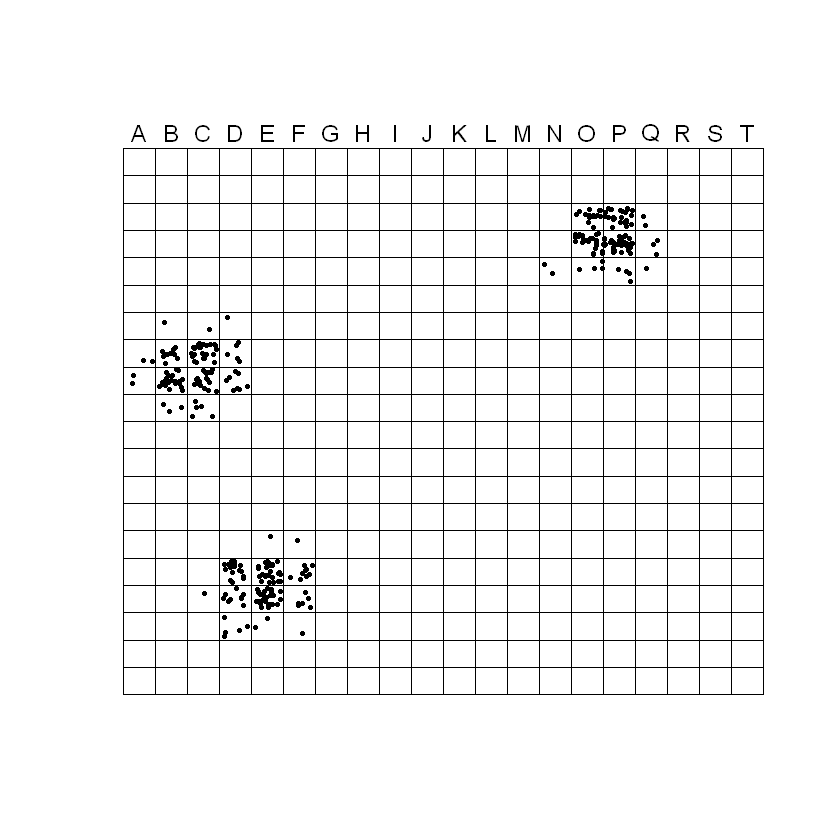

In [4]:
skthPSUACS()

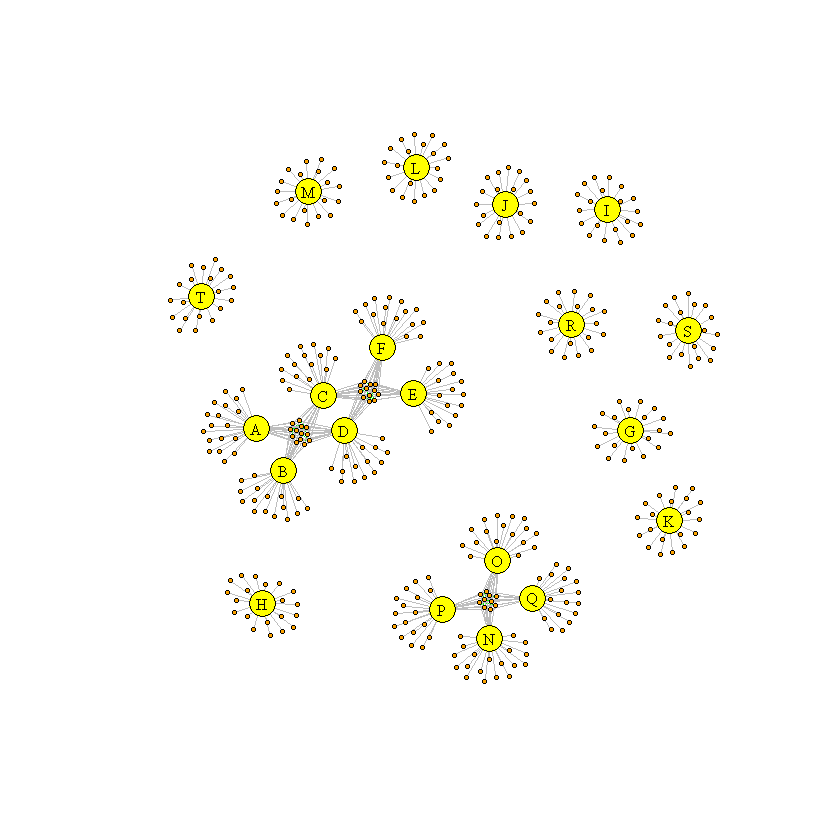

In [5]:
skthPSUACS_BIG()

In [7]:
mainPSUACS(n=1)

(varSRS_s0, varHTACS) = 1.306275 0.792525 
RE = 0.6067061 


In [8]:
mainPSUACS(n=2)

(varSRS_s0, varHTACS) = 0.6187618 0.3471276 
RE = 0.5610035 


In [9]:
mainPSUACS(n=5)

(varSRS_s0, varHTACS) = 0.2062539 0.08377898 
RE = 0.4061933 


In [10]:
mainPSUACS(n=10)

(varSRS_s0, varHTACS) = 0.06875132 0.01008242 
RE = 0.1466506 
